**Leng Her**

**Lab 9**

**November 8 2022**

#OVERVIEW

In order to understand customer segments, we will be utilizing unsupervised clustering techniques, such as: K-means, and hierarchical clustering. K-means clustering is a clustering technique that groups similar data points together in order to observe patterns in the dataset (Understanding K-means clustering in machine learning). Hierarchical clustering is essentially the same thing, grouping together similar objects, however in this lab we wil be using a dendogram to show the relationships between data points and clusters. By using these unsupervised clustering techniques, we will attempt to understand more about customer segements or profiles of similar customers.

References:

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

https://archive.ics.uci.edu/ml/datasets/wholesale+customers





1. Understanding K-means clustering in machine learning. (n.d.). Retrieved November 9, 2022, from https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1 



#DATA

Data obtained from UCI machine learning repository (LINK: https://archive.ics.uci.edu/ml/datasets/wholesale+customers). 
There is no target variable for our dataset. The dataset contains two categorical columns called: Channel, and Region; with Channel having the values of 1 or 2, with 1 representing horeaca (food catering) and 2 representing retail. In the region column it can have values of 1,2, and 3, with 1 representing Lisbon, 2 representing Oporto, and 3 representing other. For more information on the dataset please refer to the link above.

In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [141]:
df = pd.read_csv("/content/Wholesale customers data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Based soley on the head of the data, this data may need to be scaled.

#EDA

In [142]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


From the summary statistic table of our dataframe we can see that values can range from 1-3, 3-113000, 55-74000, 3-93000, 25-61000,and 3-480000. Because of the wide ranges of data we will be scaling and standarizing our data. It is also important to note that not just our ranges differ, but also that values differ in ranges over the widths. With these wide ranges it can affect our results, as each feature can impact our models in different magnitudes, in such a case we will be scaling our data to prevent this.

In [143]:
#scaling data

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = ["Channel","Region","Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"])
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [144]:
scaled_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are no null values with each value being of the int64 data type. There are 440 rows of data with 8 columns.

In [146]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


There are no null values with each value being of the float64 data type. There are 440 rows of data with 8 columns.

In [147]:
print(f"The number of columns in the dataset is: {df.shape[1]}")
print(f"The number of rows in the dataset is: {df.shape[0]}")

The number of columns in the dataset is: 8
The number of rows in the dataset is: 440


Channel 1 (horeaca/food catering) Occurances: 298
Channel 2 (retail) Occurances: 142


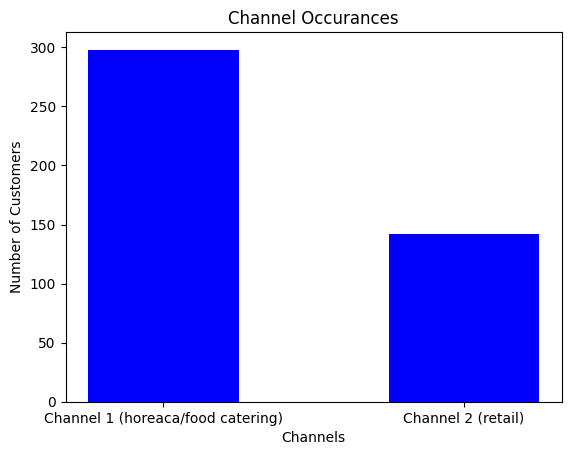

In [148]:
channel1 = len(df[df['Channel']== 1.0])
channel2 = len(df[df['Channel']== 2.0])

print("Channel 1 (horeaca/food catering) Occurances: " + str(channel1))
print("Channel 2 (retail) Occurances: " + str(channel2))

plt.bar(["Channel 1 (horeaca/food catering)","Channel 2 (retail)"], [channel1,channel2], color ="blue",width = 0.5)

plt.xlabel("Channels")
plt.ylabel("Number of Customers")
plt.title("Channel Occurances")
plt.show()

From the bar graph we can observe most of our data comes from channel 1 (food catering/horeaca) with more than double the occurances of channel 2 (retail).

Region 1 (Lisbon) Occurances: 77
Region 2 (Oporto) Occurances: 47
Region 3 (Other) Occurances: 316


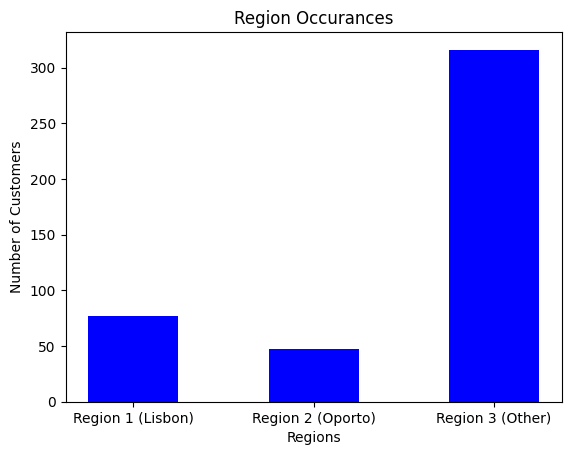

In [149]:
region1 = len(df[df['Region']== 1.0])
region2 = len(df[df['Region']== 2.0])
region3 = len(df[df['Region']== 3.0])

print("Region 1 (Lisbon) Occurances: " + str(region1))
print("Region 2 (Oporto) Occurances: " + str(region2))
print("Region 3 (Other) Occurances: " + str(region3))


plt.bar(["Region 1 (Lisbon)","Region 2 (Oporto)","Region 3 (Other)"], [region1,region2,region3], color ="blue",width = 0.5)
plt.xlabel("Regions")
plt.ylabel("Number of Customers")
plt.title("Region Occurances")
plt.show()

From this bar graph we can observe that most of the observed values are from the region other with region 1 (Lisbon) as the second most occurences in our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: vmin, vmax. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


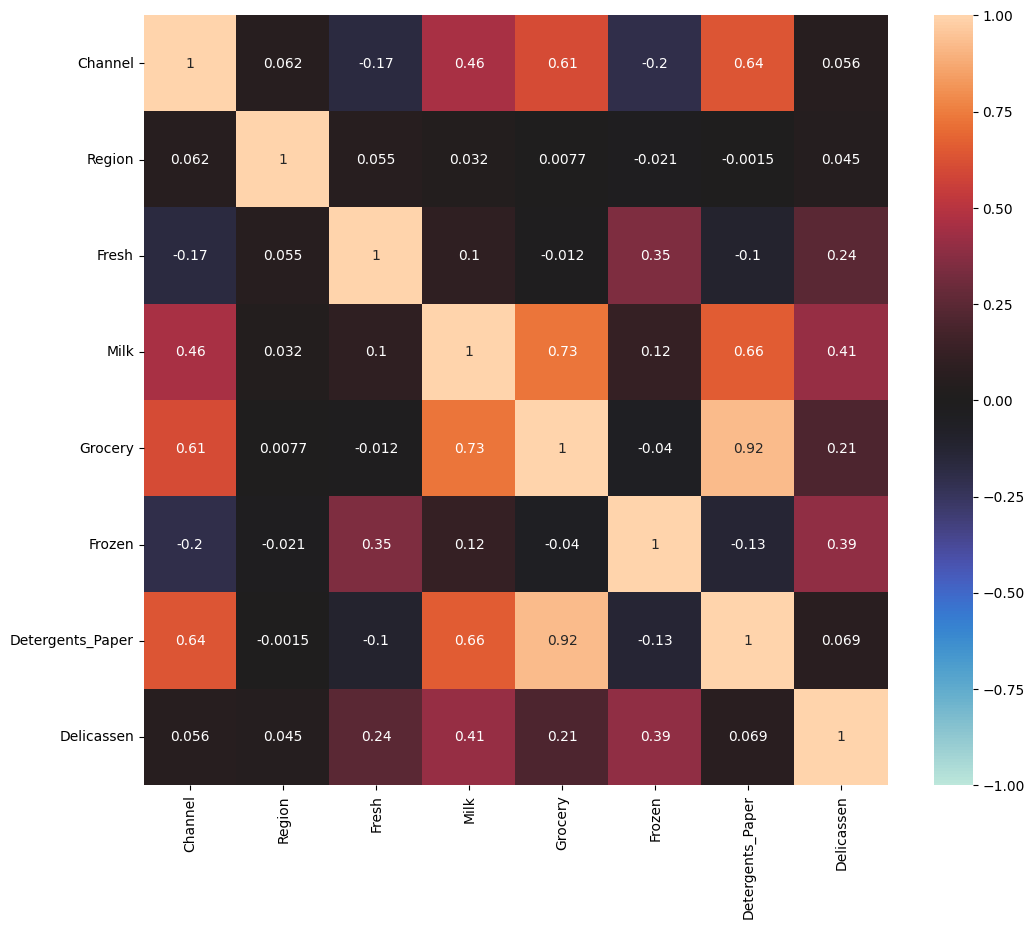

In [150]:
fig, ax = plt.subplots(figsize = (12,10))

corrmat = df.corr()
sns.heatmap(corrmat,-1,1,ax=ax, center = 0, annot = True)

From the correlation matrix we can observe that dtergents_paper and grocery have a strong positive correlation at 0.92, the highest correlation in the dataset. Other moderate-strong correlation attributes are milk to grocery, detergents_paper to milk and channel to detergents_paper and grocery.

#Models


Text(0, 0.5, 'Inertia')

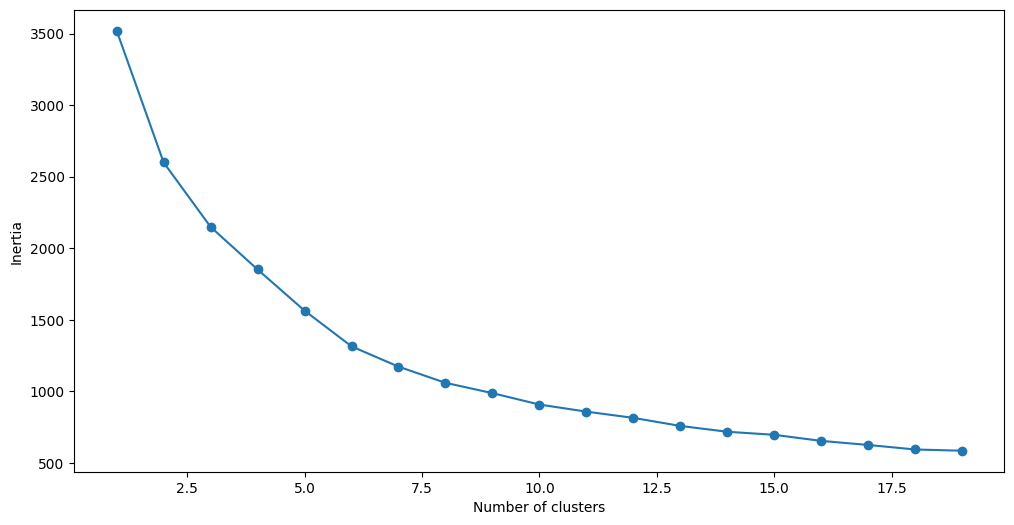

In [151]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The number of clusters we will choose will be 6, because it is better to have a lower value inertia than a higher value inertia. If the inertia value is high then it means the data points in the cluster are not similar to each other.The best way to find the "ideal" inertia is to use the elbow method, which is when the value of inertia begins to slow in decreasing value. From the inertia plot we can observe that the best values to choose from via the elbow method is between 5-8.

In [152]:
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(scaled_df)
pred = kmeans.predict(scaled_df)

In [153]:
frame = pd.DataFrame(scaled_df)
frame['cluster'] = pred
cluster_result = frame['cluster'].value_counts()
cluster_result = cluster_result.to_frame().reset_index()
cluster_result = cluster_result.rename(columns = {"index":"Cluster_No.", "cluster":"count"})
#cluster_result2 = cluster_result.set_index("Cluster_No.")
frame
#Create new dataframe with cluster column identifing which row is in which cluster



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,2
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,2
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0


In [154]:

cluster_result


,Cluster_No.,count
0,0,172
1,1,125
2,3,86
3,2,46
4,5,10
5,4,1


From the result above we can observe that 172 data values belong to cluster 1, and 125 data values for cluster 2. The most value belonging to cluster 1 and the least value belonging to cluster 5.

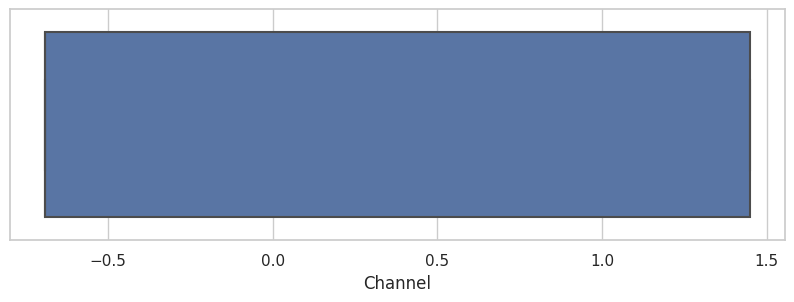

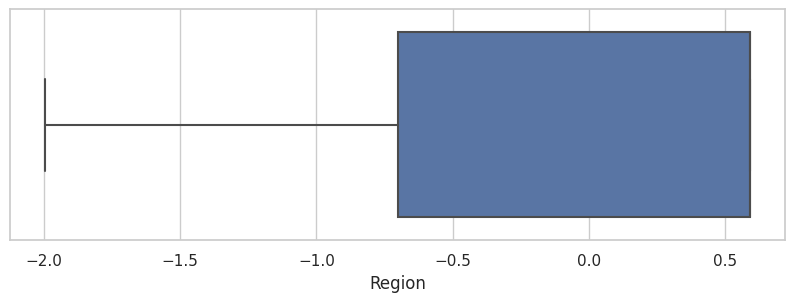

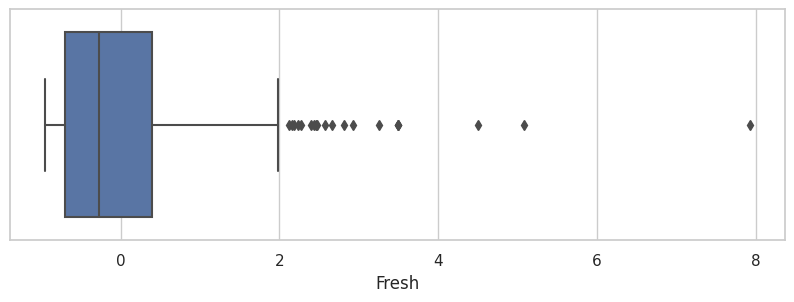

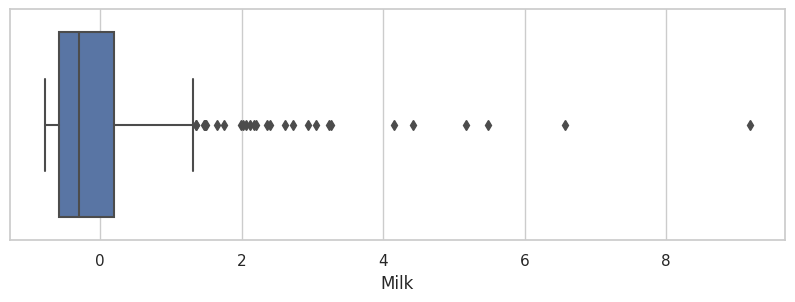

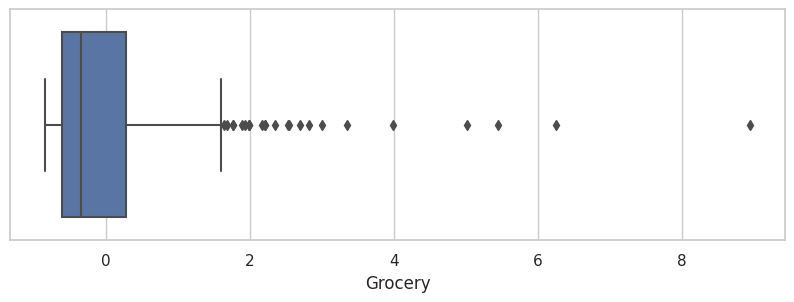

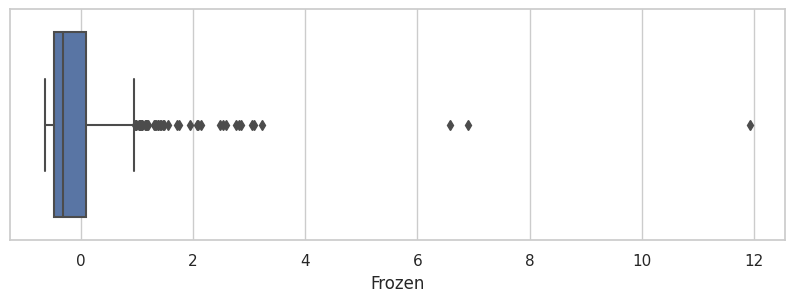

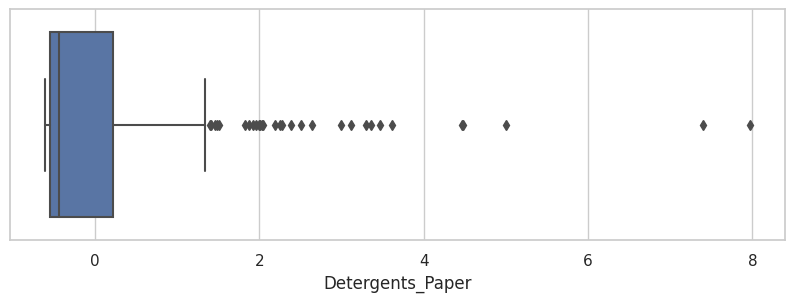

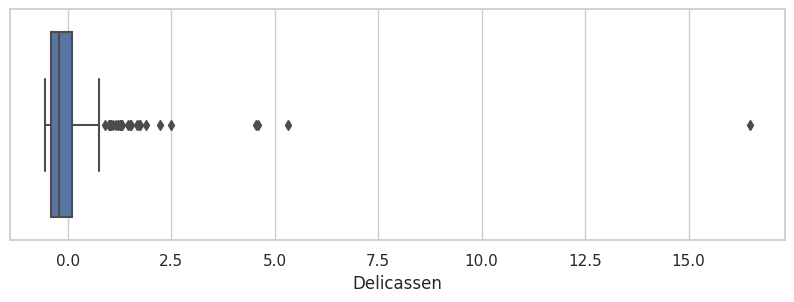

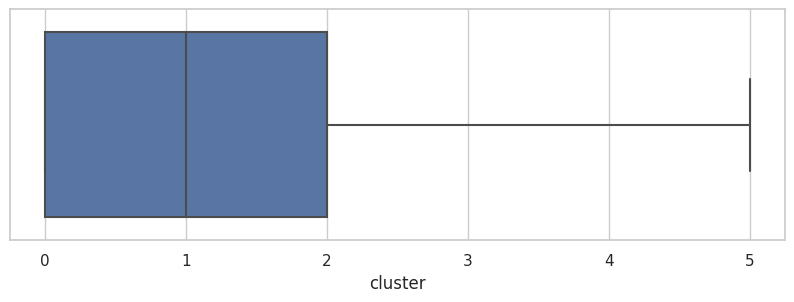

In [155]:
cols = frame.columns.to_list()
for i in cols:
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(10,3))
  ax = sns.boxplot(x=frame[i])

From the boxplot, we can observe that there seems to be a lot of data that are outliers in each attribute. However, focusing on the cluster boxplot we can observe that the median of the cluster column is 1, with the first quartile being 0 and third quartile being 2. The biggest box in the boxplot graph is the attribute Detergents_Paper. From the boxplot graphs above we can observe the differences in size of box and the maximum of the data column, giving us insight to how much is usually spent on each product.

For n_clusters = 2 The average silhouette_score is : 0.31994052364013986
For n_clusters = 3 The average silhouette_score is : 0.3905860015885686
For n_clusters = 4 The average silhouette_score is : 0.422315001077336
For n_clusters = 5 The average silhouette_score is : 0.4662703414923966
For n_clusters = 6 The average silhouette_score is : 0.47300573904455817


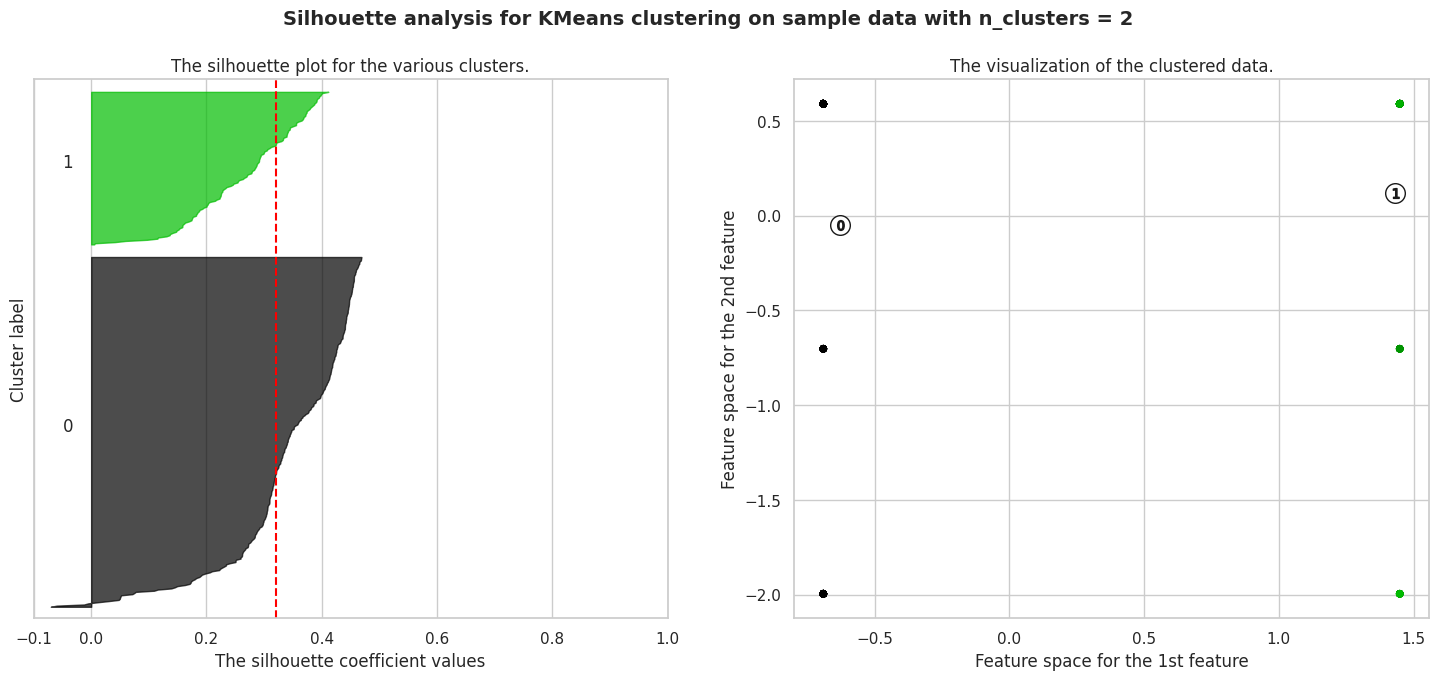

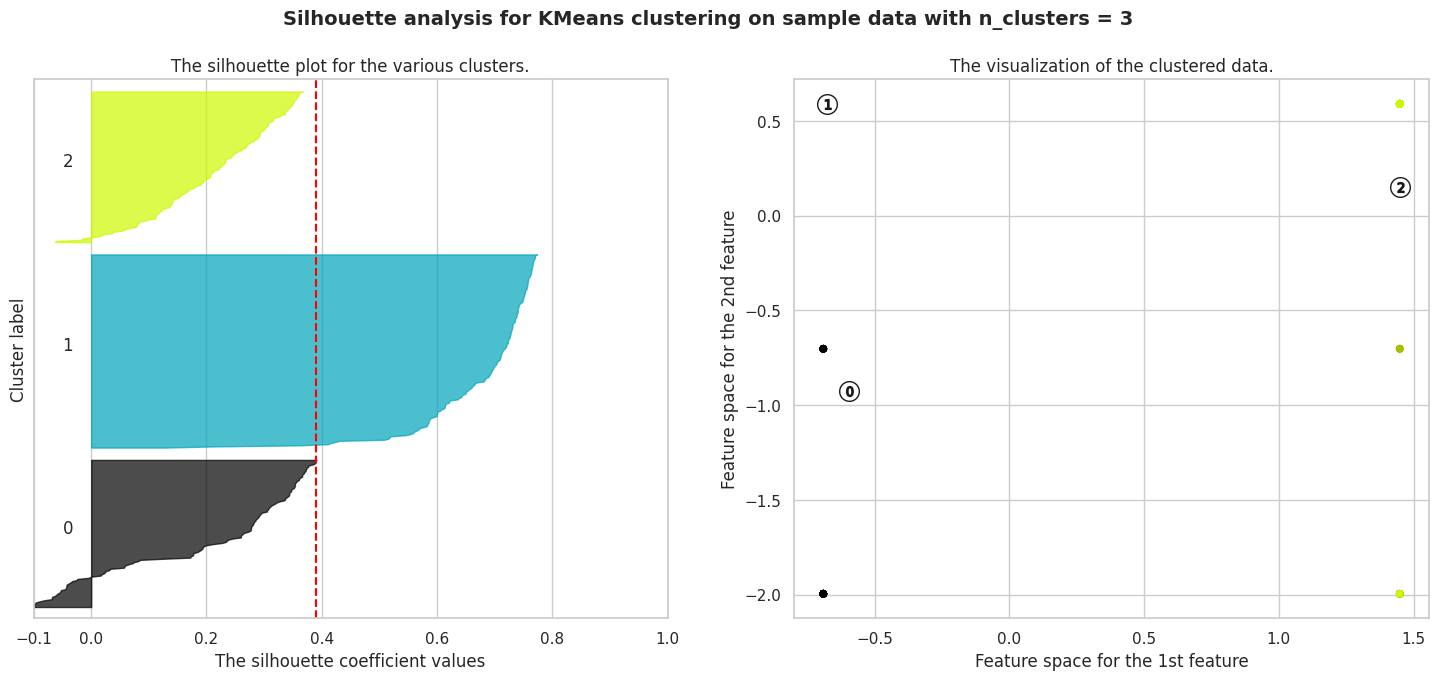

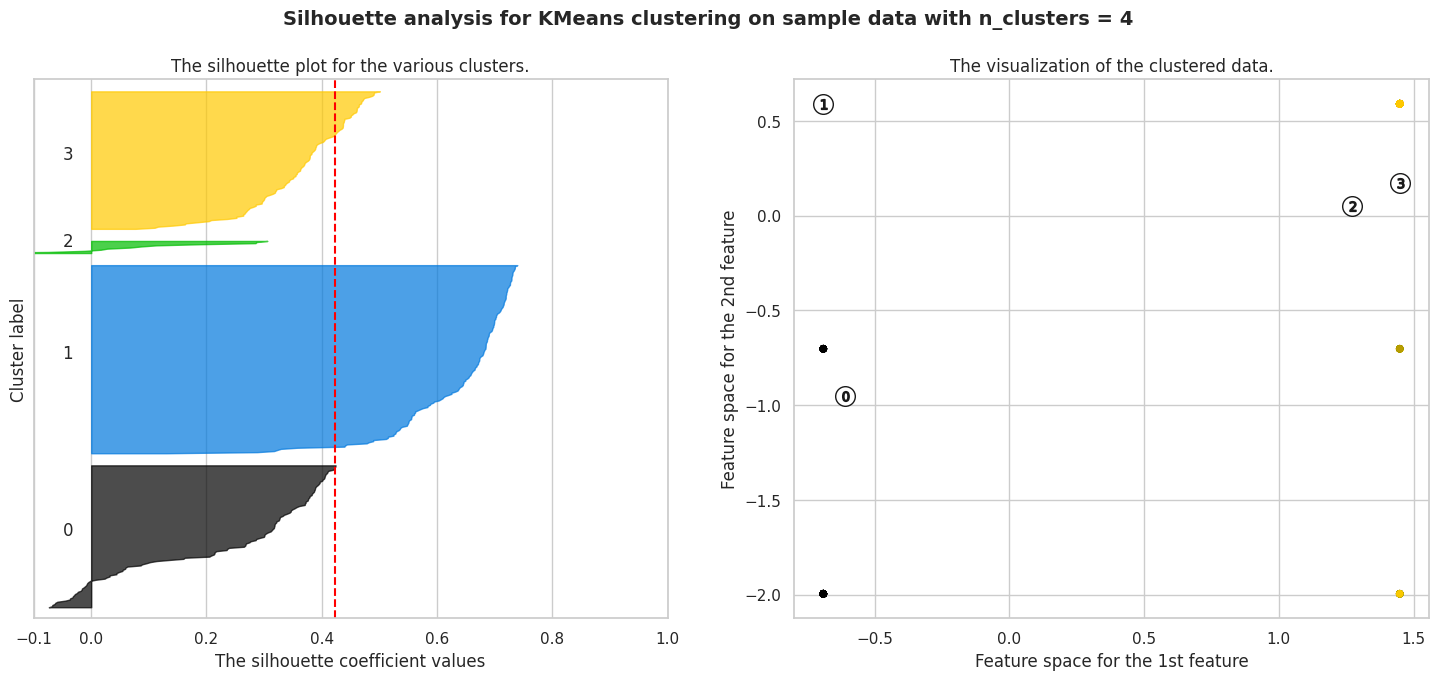

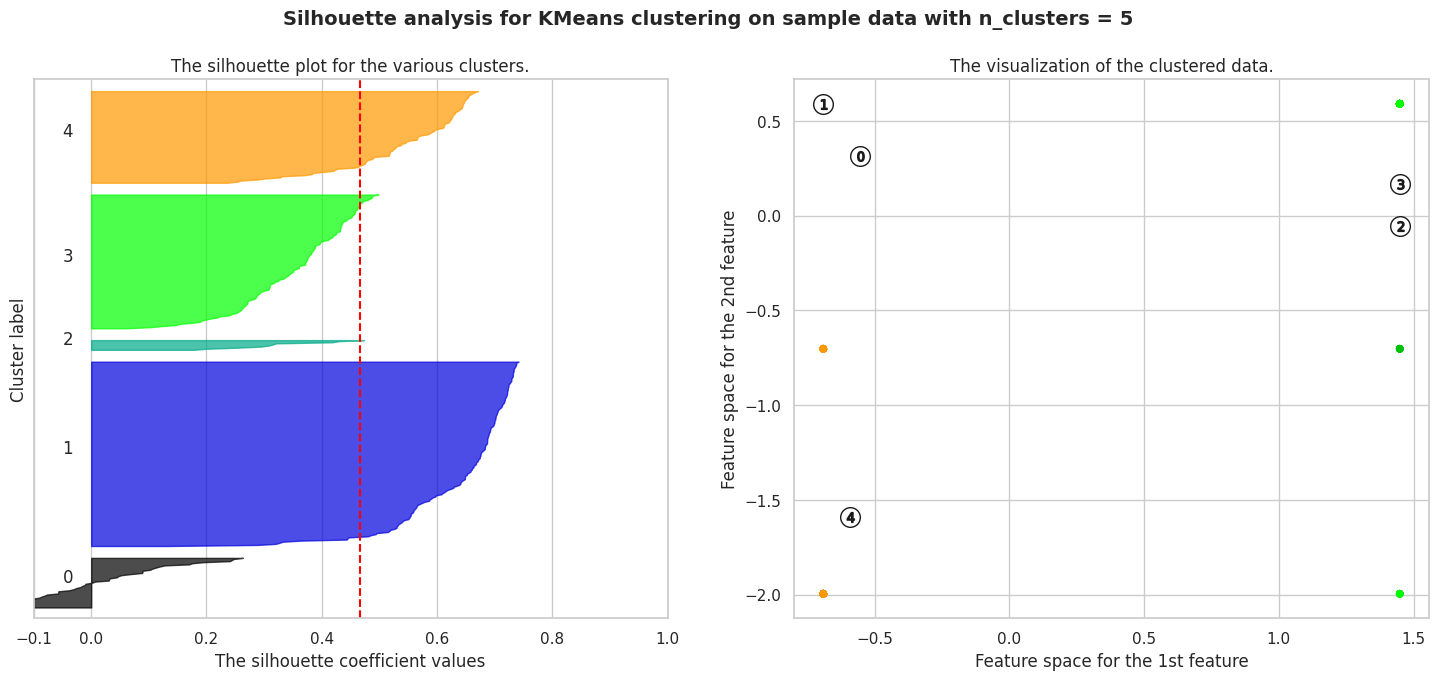

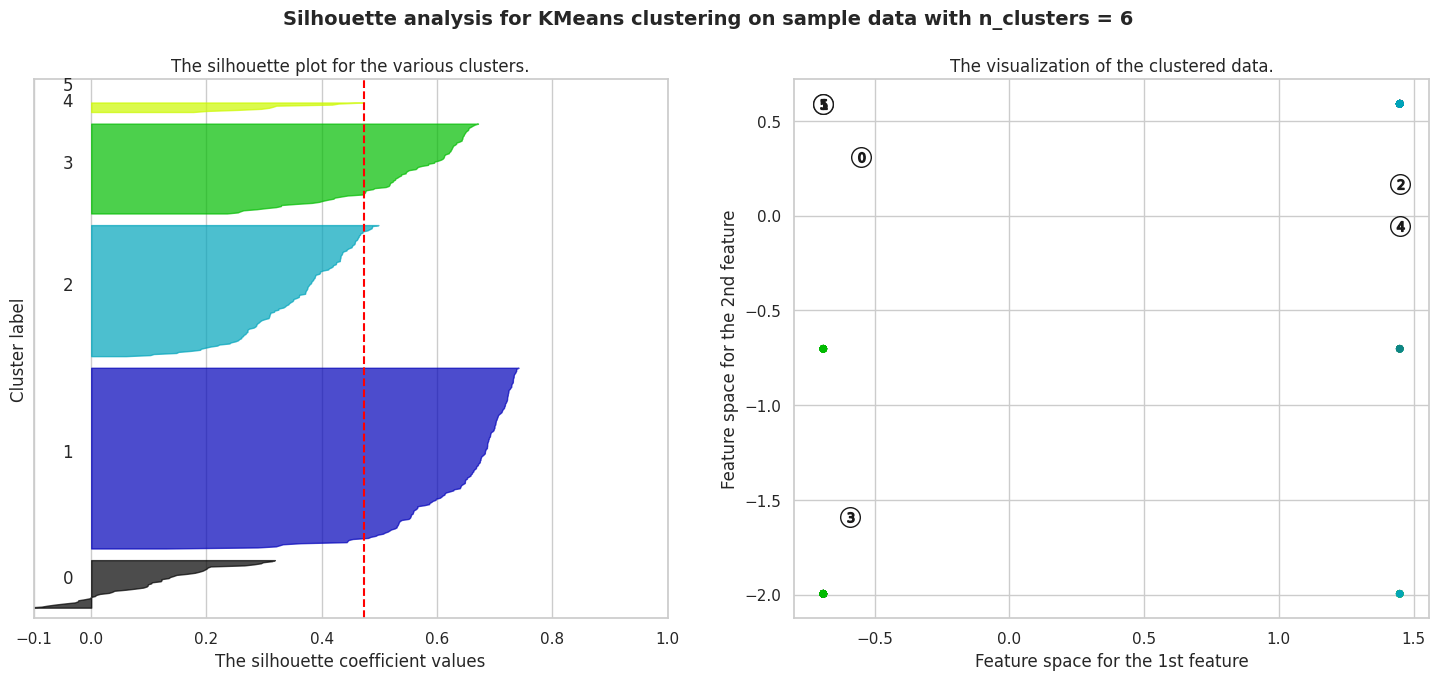

In [156]:
#CODE FROM: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(frame.to_numpy()) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frame.to_numpy())

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(frame.to_numpy(), cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(frame.to_numpy(), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        frame.to_numpy()[:, 0], frame.to_numpy()[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Our highest value silhouette score belongs to the cluster number 6 with a value of 0.473. Usually a silhouette score resides in the range [-1,1] with 1 indicating a compact cluster that is far away from other clusters and -1 being the worst possible value. Because our silhouette score for cluster number 6 is decent it shows that our model for clusters of 6 does well.

>Hierarchical Clustering

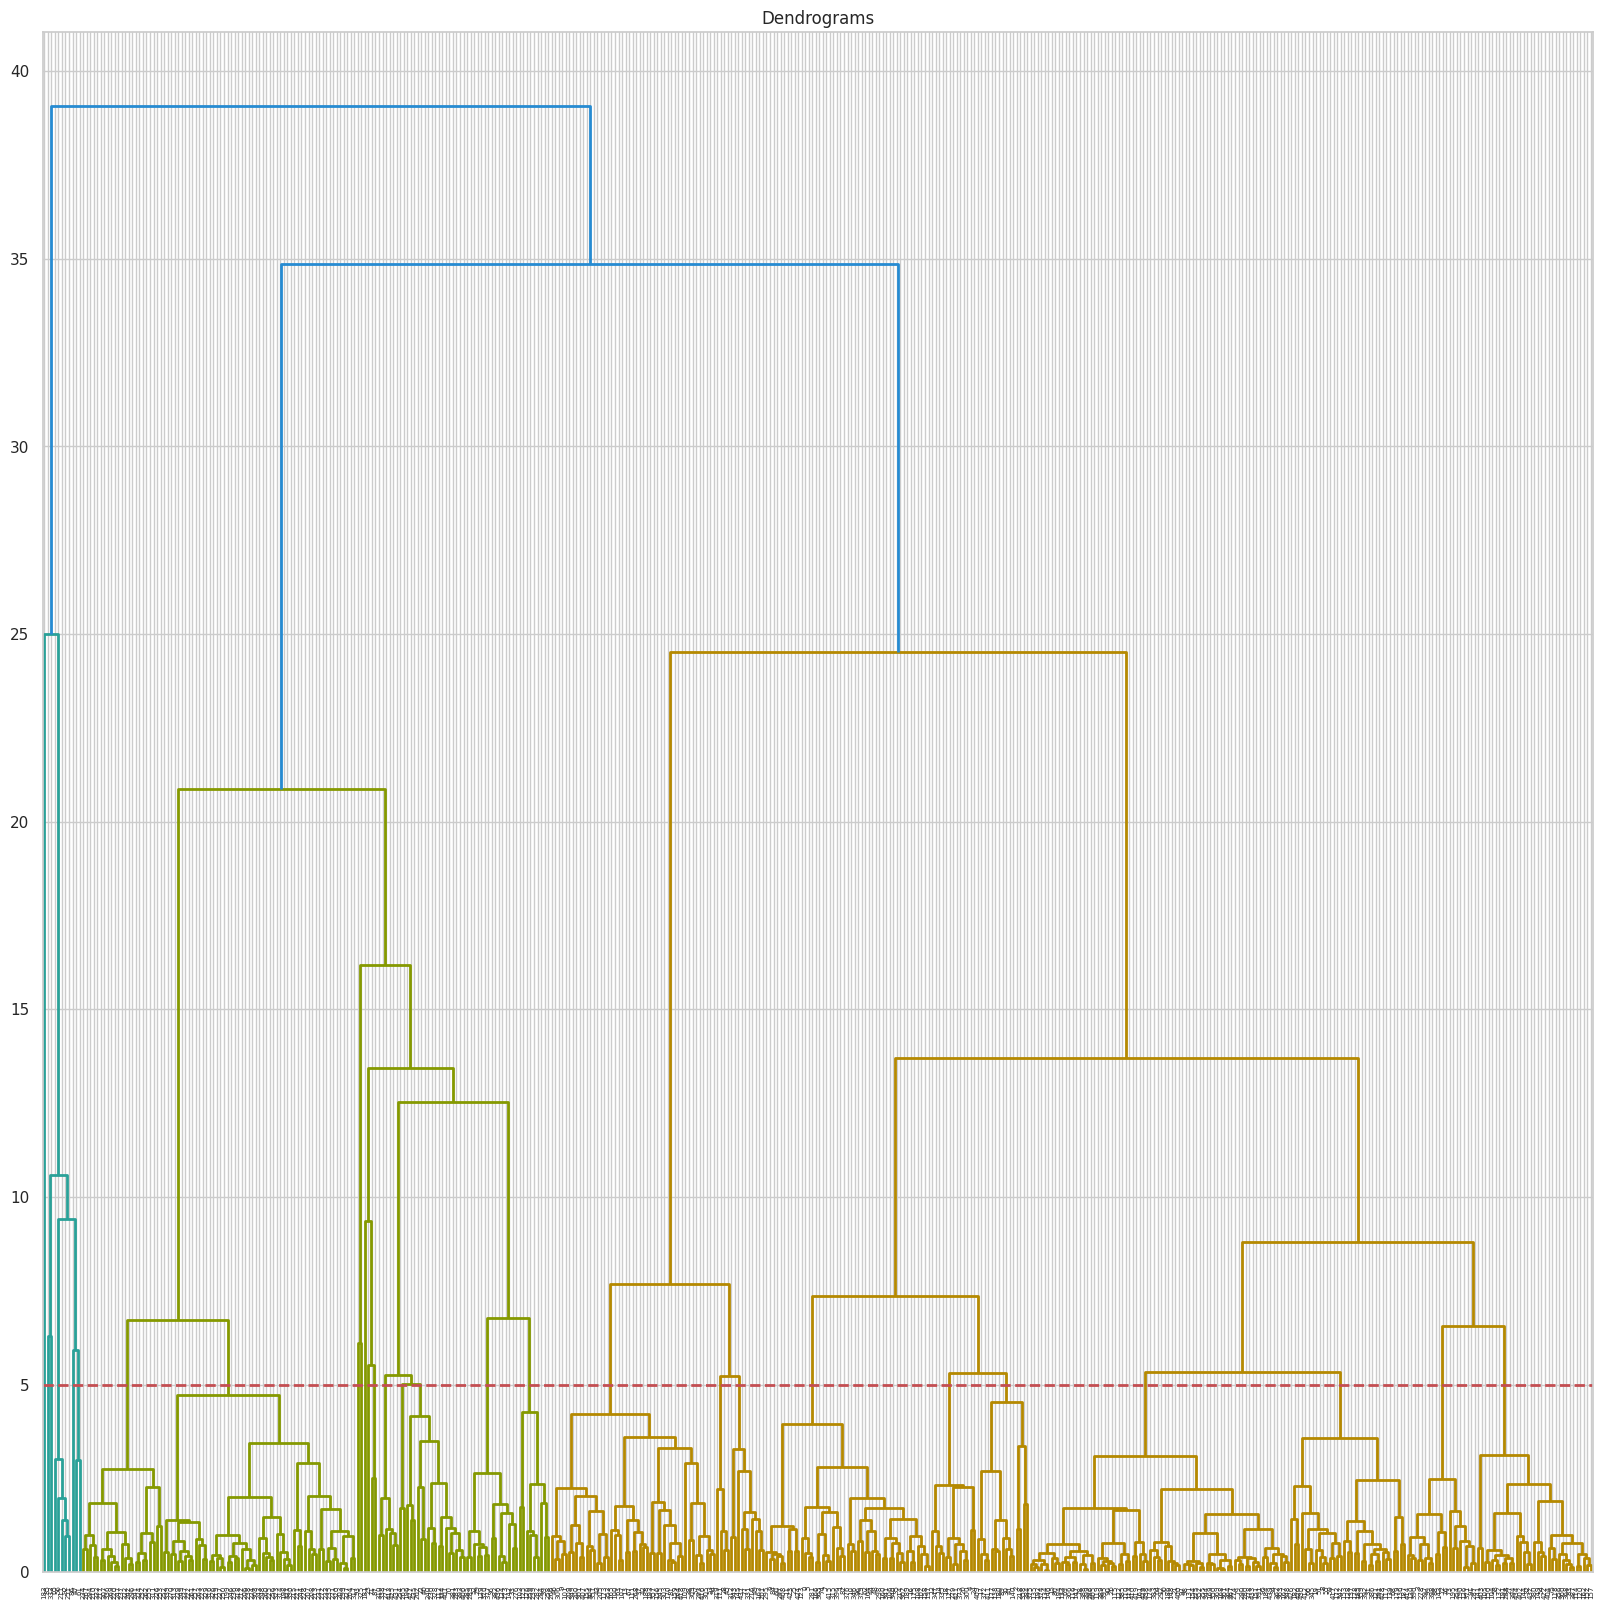

In [157]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,20))
plt.title("Dendrograms")
plt.style.use('Solarize_Light2')
test_df = scaled_df.drop(["Channel","Region"], axis = 1)
dend = shc.dendrogram(shc.linkage(test_df, method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

From the dendogram we can observe that most of the verticles of shorter distance reside between 0-5. From the dendogram we can infer that the best cluster value would be between 5-8 because of the distance of verticles are small; verticles show a degree of differences between clads.

#Conclusion

Overall, in this lab we used unsupervised clustering techniques to understand customer segments. From our data we observed a strong suggestion that there be 5-8 different clusters of customer segments. These clusters show the similarities in each of the customer profiles. From our silhouette_score, the best number of clusters to select would be 6 with a score of 0.473. Each cluster represents different patterns pretaining to each customer grouping. These grouping are dependent on the spending patterns of the customers, and our models suggest 6 different clusters of these spending patterns, with the most data points belonging to cluster 1 and in second most belonging in cluster 2. 